#Introduction to regression


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.1


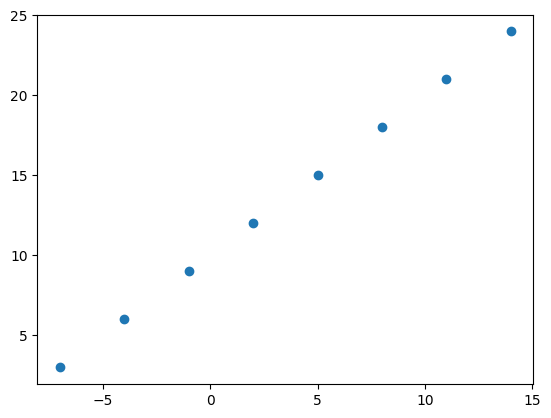

In [ ]:
#creating data to view and fit
import numpy as np
import matplotlib.pyplot as plt

#create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#create labels

y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])


#visualize

plt.scatter(X,y)

#input and output shapes


In [ ]:
#demo tensor for house prediction problem
#we can also use strings in tensor the dtype of tensor will be object and the length of string doesn't matter here

house_info = tf.constant(["bedroom","bathroom","garage"])

house_price = tf.constant([939700])

house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

# careful , the above features and labels data are still numpy and tensorflow models only works with tensors
# so yeah, we have to convert numpy to tensors




((8,), (8,))

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

#so there is no shape for individual data

((), ())

In [ ]:
#let's convert these to tensors
#Also change these into dtype float32
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y),dtype = tf.float32)

X,y

# (<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
#  <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

(TensorShape([8]), TensorShape([8]))

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

##steps in modelling with tensorflow

1. creating a model - define the input and output layers, as well as hidden layers

2. compiling a model - define a loss function and optimizer and evaluation metrics

3. Fitting a model - letting a model try to find patters in data between X and y or features and labels




In [ ]:
#set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5, verbose=2)

Epoch 1/5
1/1 - 1s - loss: 11.3034 - mae: 11.3034 - 751ms/epoch - 751ms/step
Epoch 2/5
1/1 - 0s - loss: 11.1709 - mae: 11.1709 - 18ms/epoch - 18ms/step
Epoch 3/5
1/1 - 0s - loss: 11.0384 - mae: 11.0384 - 14ms/epoch - 14ms/step
Epoch 4/5
1/1 - 0s - loss: 10.9059 - mae: 10.9059 - 12ms/epoch - 12ms/step
Epoch 5/5
1/1 - 0s - loss: 10.7734 - mae: 10.7734 - 10ms/epoch - 10ms/step


Epoch 1/5
1/1 [==============================] - 0s 486ms/step - loss: 11.4319 - mae: 11.4319

Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2994 - mae: 11.2994

Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 11.1669 - mae: 11.1669

Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.0344 - mae: 11.0344

Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 10.9019 - mae: 10.9019


In [ ]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 77ms/step


array([[-18.795279]], dtype=float32)

1/1 [==============================] - 0s 104ms/step
array([[13.069829]], dtype=float32)

## Improving our model

1. add more layer, increase the number of hidden unit(all called nuerons) within each hidden layers, change the activation function of each layer.


2. change the optimization function or learning rate of optimization function

3. fit model for more epochs or more data

In [ ]:
#set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    # tf.keras.layers.Dense(10,activation="relu"),
    # tf.keras.layers.Dense(2,activation="relu"),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ['mae'])

# fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 600ms/step - loss: 13.8632 - mae: 13.8632
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9729 - mae: 12.9729
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.1184 - mae: 12.1184
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.4700 - mae: 11.4700
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.8171 - mae: 10.8171
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 10.1529 - mae: 10.1529
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 9.4826 - mae: 9.4826
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.8041 - mae: 8.8041
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 8.1107 - mae: 8.1107
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4018 - mae: 7.4018
Epoch 11/100
1/1 [==============================] - 0s 9ms/

Epoch 100/100
1/1 [==============================] - 0s 8ms/step - loss: 6.8363 - mae: 6.8363

1/1 [==============================] - 0s 57ms/step
array([[29.670727]], dtype=float32)


In [ ]:
y_pred = model.predict([19.0])
y_pred

1/1 [==============================] - 0s 36ms/step


array([[29.801214]], dtype=float32)

##Evaluatin the model

visualize

## Lets do the same with larger dataset

In [ ]:
X1 = tf.range(-100,100,4)
X1

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y1 = X1+10
y1

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

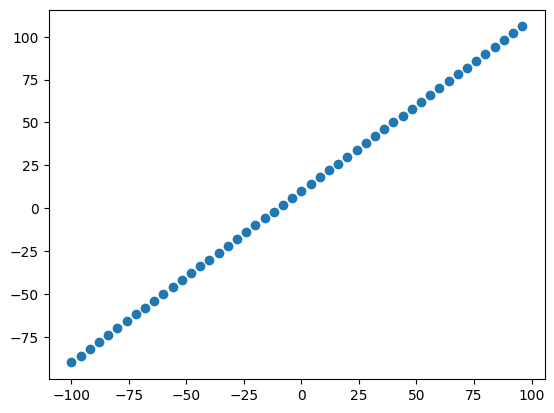

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X1,y1)

### The three sets

1. Training set 70 to 80 percent of total data
2. Validation set 10 to 15 percent of total data for tuning model
3. Test set



`analogy - Course material -> practice exam -> final exam`

In [ ]:
len(X1)

50

In [ ]:
#split the data
X1_train = X1[:40] #first 40 data or 80%
y1_train = y1[:40]

X1_test = X1[40:] #last 10 data
y1_test = y1[40:]

len(X1_train), len(X1_test), len(y1_train),len(y1_test)



(40, 10, 40, 10)

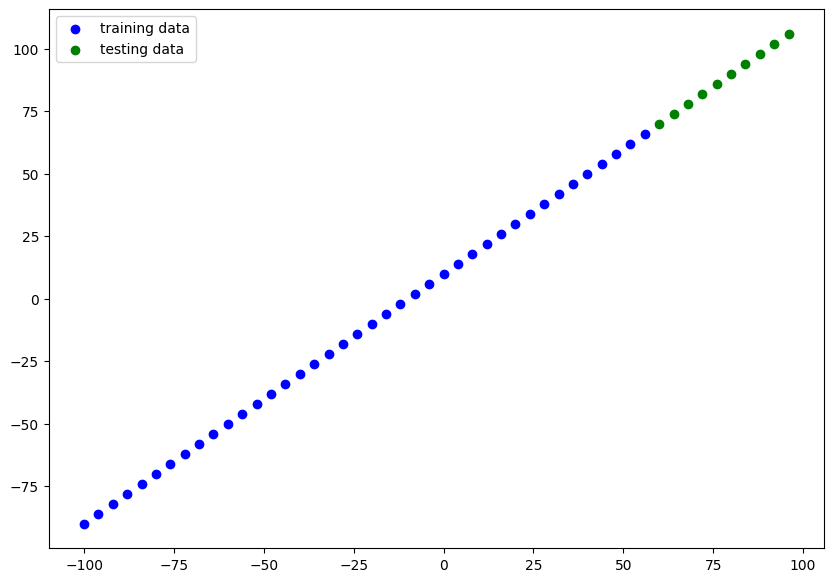

In [ ]:
### visualizing the test and training data

plt.figure(figsize=(10,7))

plt.scatter(X1_train,y1_train, c="b",label="training data")
plt.scatter(X1_test,y1_test, c="g",label="testing data")
plt.legend()

* Total params - total number of
parameters in the model

---



* Trainable params - These are the parameters (patterns) the model can update as it trains

---



* Non-trainable params - these parameters are not updated during training(this is typical when you bring in already learned patters or parameters from other models during **transfer learning**)

In [ ]:
#create model
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,name="input_layer")
],name="model_X")

#compile model

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])

#fit the model
model.fit(tf.expand_dims(X1_train, axis=-1), y1_train, epochs=10, verbose=2)

Epoch 1/10
2/2 - 0s - loss: 33.6359 - mae: 33.6359 - 351ms/epoch - 175ms/step
Epoch 2/10
2/2 - 0s - loss: 8.9813 - mae: 8.9813 - 10ms/epoch - 5ms/step
Epoch 3/10
2/2 - 0s - loss: 12.7954 - mae: 12.7954 - 9ms/epoch - 5ms/step
Epoch 4/10
2/2 - 0s - loss: 8.3533 - mae: 8.3533 - 9ms/epoch - 4ms/step
Epoch 5/10
2/2 - 0s - loss: 11.8471 - mae: 11.8471 - 9ms/epoch - 5ms/step
Epoch 6/10
2/2 - 0s - loss: 10.9699 - mae: 10.9699 - 9ms/epoch - 5ms/step
Epoch 7/10
2/2 - 0s - loss: 8.4681 - mae: 8.4681 - 9ms/epoch - 5ms/step
Epoch 8/10
2/2 - 0s - loss: 8.8762 - mae: 8.8762 - 9ms/epoch - 5ms/step
Epoch 9/10
2/2 - 0s - loss: 17.1198 - mae: 17.1198 - 11ms/epoch - 5ms/step
Epoch 10/10
2/2 - 0s - loss: 12.4701 - mae: 12.4701 - 10ms/epoch - 5ms/step


In [ ]:
#visualizing the model before running it

model.summary()

Model: "model_X"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


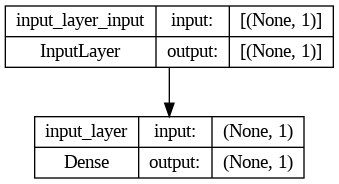

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True,)

In [ ]:
y1_pred = model.predict(X1_test)
y1_pred

1/1 [==============================] - 0s 57ms/step


array([[ 65.04774 ],
       [ 69.375755],
       [ 73.70377 ],
       [ 78.031784],
       [ 82.3598  ],
       [ 86.68782 ],
       [ 91.01583 ],
       [ 95.34385 ],
       [ 99.67187 ],
       [103.99988 ]], dtype=float32)

In [ ]:
y1_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

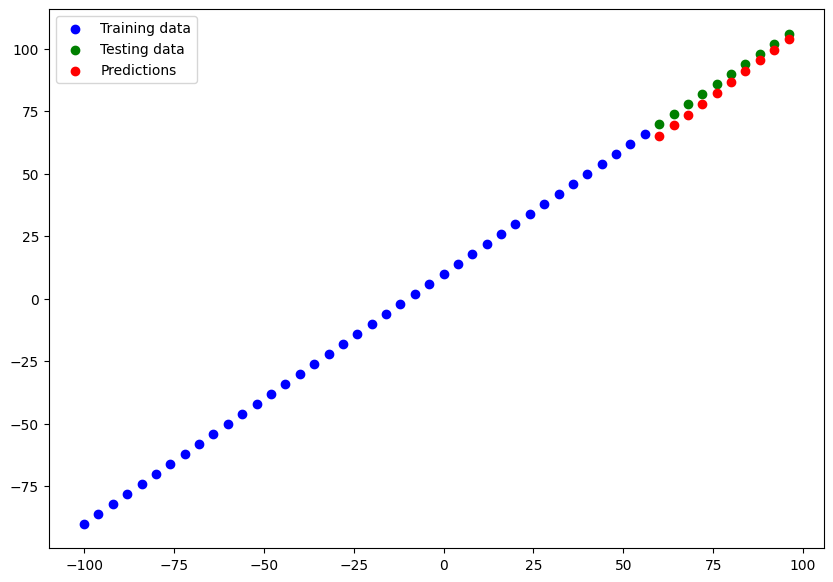

In [ ]:
def plot_predictions(train_data = X1_train,
                     train_labels = y1_train,
                     test_data = X1_test,
                     test_labels = y1_test,
                     predictions = y1_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  plt.legend()


plot_predictions()

### Evaluating model's predictions with regression evaluation metrics

In [ ]:
model.evaluate(X1_test,y1_test)

1/1 [==============================] - 0s 115ms/step - loss: 3.4762 - mae: 3.4762


[3.4761900901794434, 3.4761900901794434]

In [ ]:
# Function to use MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                        y_pred = y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                       y_pred = y_pred)

In [ ]:
#create the model again

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),

    tf.keras.layers.Dense(1 )
])

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

model_2.fit(tf.expand_dims(X1_train, axis=-1), y1_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 32.6046 - mae: 32.6046
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 20.0367 - mae: 20.0367
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 15.3084 - mae: 15.3084
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 6.6554 - mae: 6.6554
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 9.6843 - mae: 9.6843
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 6.3140 - mae: 6.3140
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 10.2915 - mae: 10.2915
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 12.8882 - mae: 12.8882
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 25.9032 - mae: 25.9032
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 15.1379 - mae: 15.1379
Epoch 11/100
2/2 [==============================] - 0s 6ms/step 

1/1 [==============================] - 0s 82ms/step


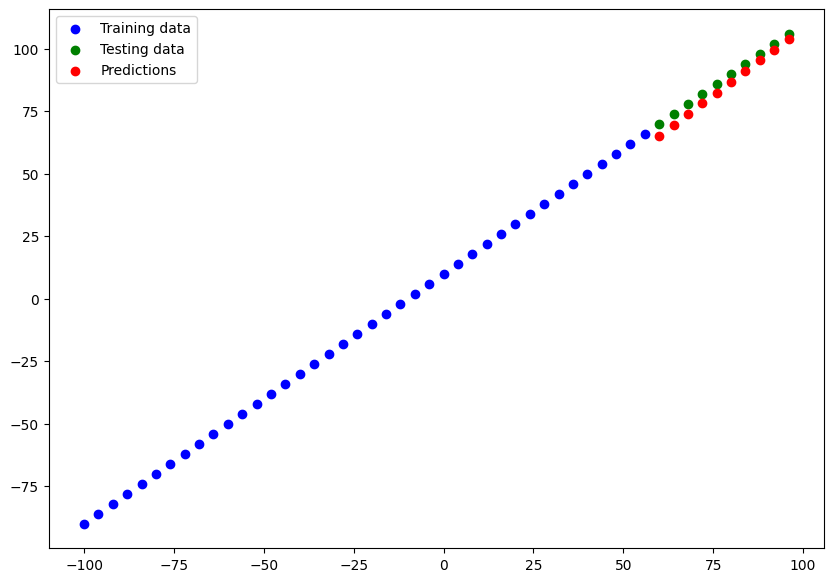

In [ ]:
y_preds_2 = model_2.predict(X1_test)
plot_predictions(predictions = y_preds_2)

In [ ]:
# calculate evaluation matrices

mae_1 = mae(y1_test,tf.squeeze(y_preds_2))
mse_1 = mse(y1_test,tf.squeeze(y_preds_2))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=3.4012191>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.312082>)

## Saving the model

Two main formats to save the model:
* The saved model format by tensorflow
* HD5 format by keras

In [ ]:
model_2.save("first_tensorflow_model_savedformat")

In [ ]:
model_2.save("first_tensorflow_modelin_hd5.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_2.save("first_tensorflow_modelin_newkerasformat.keras")